In [ ]:
# Decision Tree - 
# Random Forest - 
# 1. Bagging 
# 2. Boosting 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import sklearn

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Gradient Boosted Trees 
# xgboost -> Extreme Gradient Boosting
# lightgbm ->
# catboost ->

# Titanic

In [ ]:
# 1. Understand problem statement (ask Questions to clarify)
# 2. Accquire Data 
# 3. Clean, prepare the data
# 4. EDA (understanding your data)
# 5. Modelling & testing
# 6. Visualize & Report the result
# 7. Document

In [ ]:
# C Framwork 
# ----------
# Classify 
# Correlation 
# Converting 
# Completing 
# Correcting 
# Creating
# Charting

In [2]:
train_df = pd.read_csv("Titanic_train.csv")

In [3]:
train_df.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

In [9]:
train_df.shape

(891, 12)

In [4]:
"""
Variable	          Definition	                              Key
survival 	          Survival 	                                0 = No, 1 = Yes
pclass 	            Ticket class 	                            1 = 1st, 2 = 2nd, 3 = 3rd
sex 	              Sex 	
Age 	              Age in years 	
sibsp 	            # of siblings / spouses aboard the Titanic 	
parch 	            # of parents / children aboard the Titanic 	
ticket 	            Ticket number 	
fare 	              Passenger fare 	
cabin 	            Cabin number 	
embarked 	          Port of Embarkation 	                    C = Cherbourg, Q = Queenstown, S = Southampton
"""
print("Features")

Features


In [5]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
# Cat - 
# Cont - 

In [8]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Empty Rate
# Cabin > Age > Embarked

In [11]:
train_df.describe()

PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]

In [ ]:
# Dont focus on PassengerID

In [12]:
train_df.describe(include=[object])

Name   Sex Ticket        Cabin Embarked
count                        891   891    891          204      889
unique                       891     2    681          147        3
top     Moubarek, Master. Gerios  male   1601  C23 C25 C27        S
freq                           1   577      7            4      644

In [13]:
train_df.sample(5)

PassengerId  Survived  Pclass  ...    Fare Cabin  Embarked
665          666         0       2  ...  73.500   NaN         S
822          823         0       1  ...   0.000   NaN         S
165          166         1       3  ...  20.525   NaN         S
236          237         0       2  ...  26.000   NaN         S
636          637         0       3  ...   7.925   NaN         S

[5 rows x 12 columns]

In [25]:
train_df[["SibSp", "Survived"]].groupby("SibSp").mean()

Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4      0.166667
5      0.000000
8      0.000000

In [21]:
train_df[["Pclass", "Survived"]].groupby(["Pclass"]).mean()

Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363

In [ ]:
# You survival rate increase with increase in class

In [23]:
train_df[["Sex", "Survived"]].groupby("Sex").mean()

Survived
Sex             
female  0.742038
male    0.188908

In [26]:
train_df[["Parch", "Survived"]].groupby("Parch").mean()

Survived
Parch          
0      0.343658
1      0.550847
2      0.500000
3      0.600000
4      0.000000
5      0.200000
6      0.000000

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
train_df["Survived"] = train_df.Survived.astype("object")

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


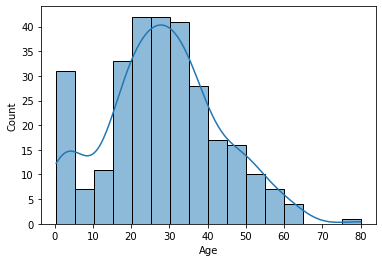

In [39]:
sns.histplot(train_df.loc[train_df.Survived == 1, "Age"], kde=True)

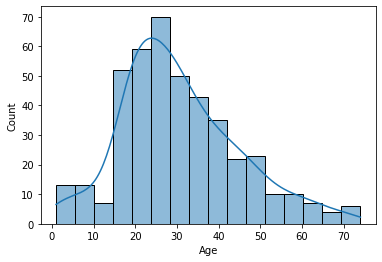

In [41]:
sns.histplot(train_df.loc[train_df.Survived == 0, "Age"], kde=True)

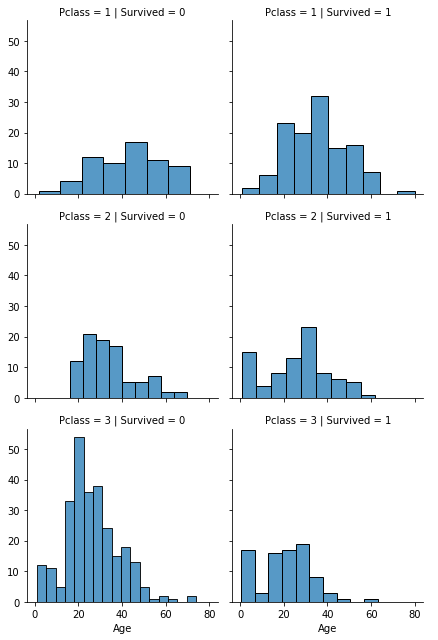

In [44]:
grid = sns.FacetGrid(train_df, col="Survived", row="Pclass")
grid.map(sns.histplot, "Age")
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


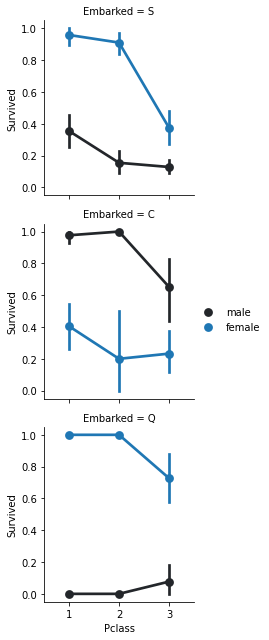

In [46]:
grid = sns.FacetGrid(data = train_df, row="Embarked")
grid.map(sns.pointplot, "Pclass", "Survived", "Sex")
grid.add_legend()

In [49]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [50]:
train_df = train_df.drop(columns=["Cabin"])

In [51]:
train_df.sample(5)

PassengerId Survived  Pclass  ...         Ticket      Fare  Embarked
330          331        1       3  ...         367226   23.2500         Q
842          843        1       1  ...         113798   31.0000         C
341          342        1       1  ...          19950  263.0000         S
547          548        1       2  ...  SC/PARIS 2146   13.8625         C
112          113        0       3  ...         324669    8.0500         S

[5 rows x 11 columns]

In [52]:
# Feature Extraction

In [54]:
train_df.Name.values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [56]:
train_df["title"] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=True)

In [57]:
train_df.sample(5)

PassengerId Survived  Pclass  ...     Fare Embarked   title
502          503        0       3  ...   7.6292        Q    Miss
751          752        1       3  ...  12.4750        S  Master
860          861        0       3  ...  14.1083        S      Mr
610          611        0       3  ...  31.2750        S     Mrs
20            21        0       2  ...  26.0000        S      Mr

[5 rows x 12 columns]

In [58]:
train_df.title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Capt          1
Don           1
Countess      1
Lady          1
Mme           1
Ms            1
Sir           1
Jonkheer      1
Name: title, dtype: int64

In [61]:
pd.crosstab(train_df["title"], train_df["Sex"])

Sex       female  male
title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1

In [65]:
train_df.loc[train_df.Age.isna(), ["Age", "Sex", "title"]]

Age     Sex title
5    NaN    male    Mr
17   NaN    male    Mr
19   NaN  female   Mrs
26   NaN    male    Mr
28   NaN  female  Miss
..   ...     ...   ...
859  NaN    male    Mr
863  NaN  female  Miss
868  NaN    male    Mr
878  NaN    male    Mr
888  NaN  female  Miss

[177 rows x 3 columns]

In [68]:
train_df2 = train_df.drop(columns=["PassengerId", "Name"])